In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import RobustScaler


# Load the CSV files into DataFrames
df_1 = pd.read_csv('https://raw.githubusercontent.com/apekshai101/Project_4/main/test.csv')
df_2 = pd.read_csv('https://raw.githubusercontent.com/apekshai101/Project_4/main/train.csv')
df_1.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [2]:
#Concatenate DataFrames
df = pd.concat([df_1, df_2], axis=0, ignore_index=True)
df.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [3]:
df.shape

(129880, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [5]:
# Check for any null values in the DataFrame
print("Null values in each column:")
print(df.isnull().sum())

Null values in each column:
Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes     

In [6]:
 # Remove rows with missing values
df.dropna(subset=['Arrival Delay in Minutes'], inplace=True)
print(df.isnull().sum())

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64


In [7]:
# Identify duplicates in dataframe
duplicates = df.duplicated()
duplicates_number = duplicates.sum()
duplicates_number

0

In [8]:
# Determine the number of unique values in each column.
unique_counts = df.nunique()
print(unique_counts)

Unnamed: 0                           103656
id                                   129487
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3821
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

In [9]:
# Preprocess: Drop columns not useful for prediction
df.drop(['Unnamed: 0','id'], axis=1, inplace=True)
df.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [10]:
# Get categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)

Categorical columns: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


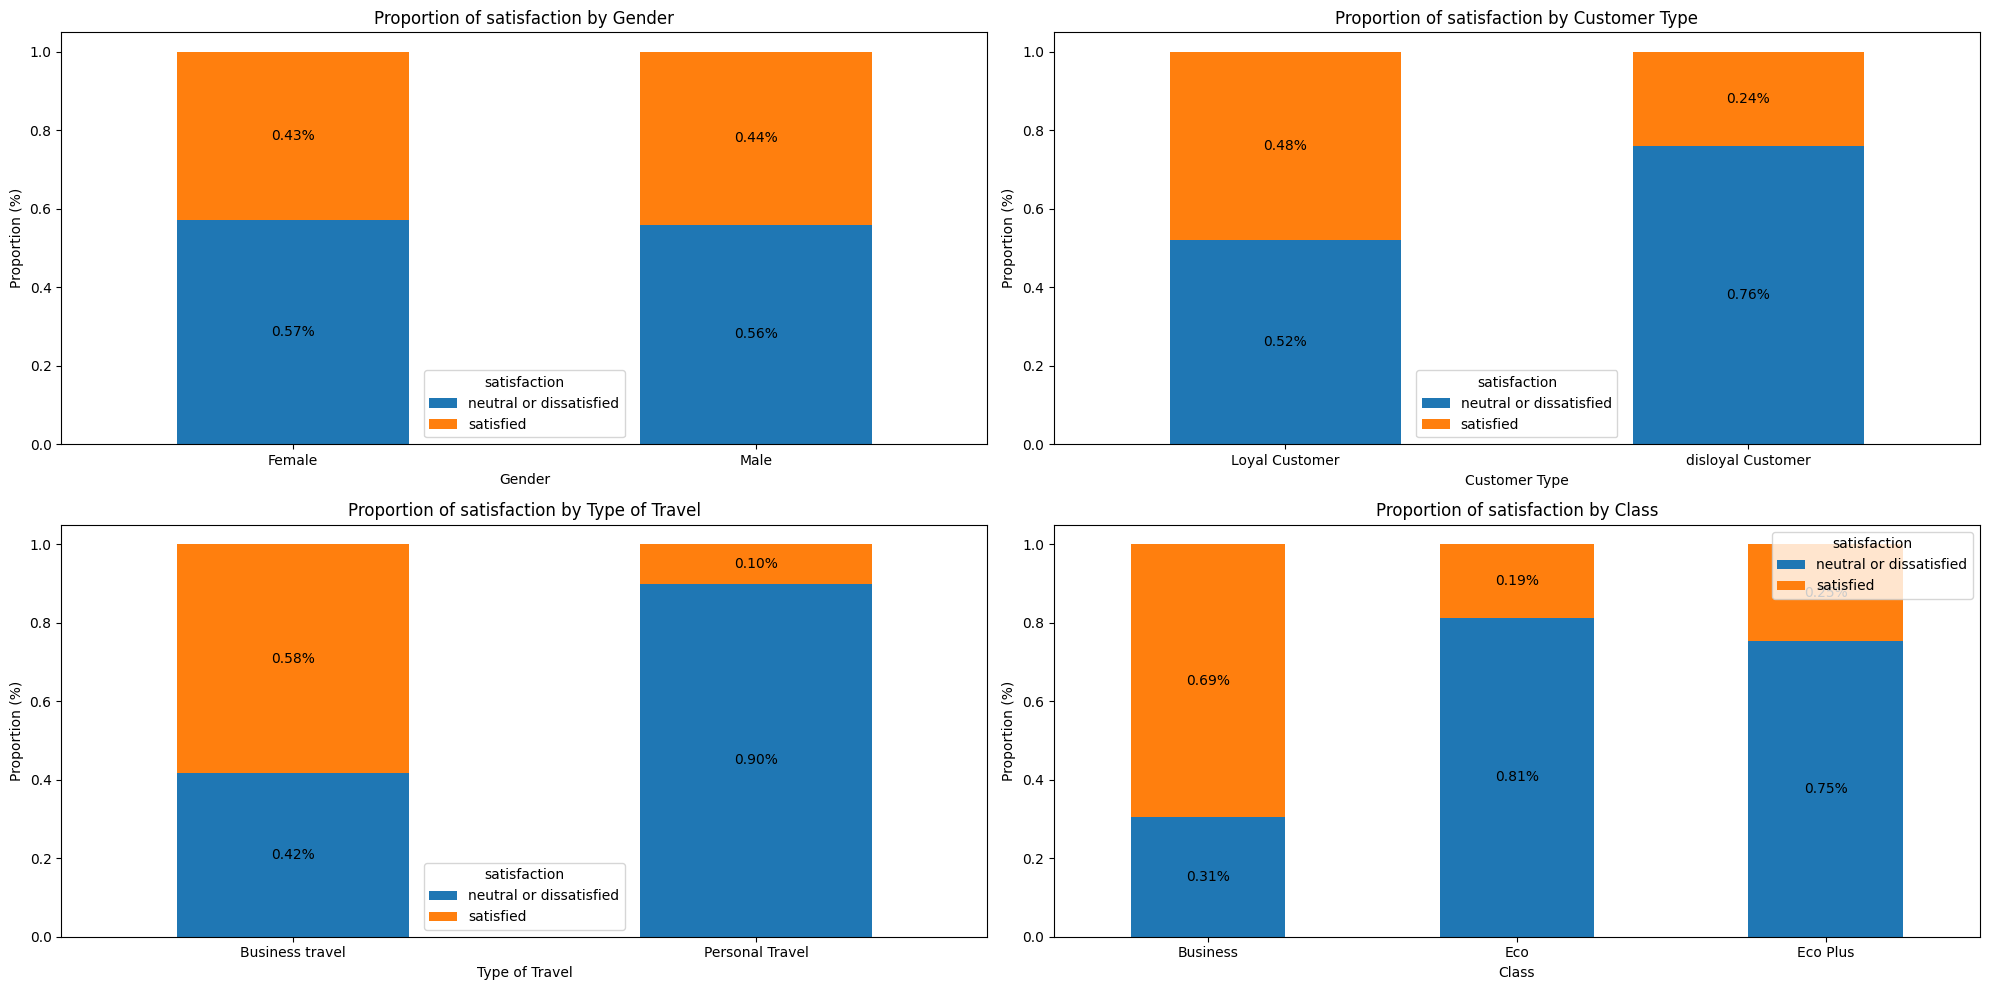

In [11]:
categorical_columns1 = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

plt.figure(figsize=(20, 10))
for i, column in enumerate(categorical_columns1, 1):
    plt.subplot(2, 2, i)

    # Calculate the proportions
    prop_df = df.groupby(column)['satisfaction'].value_counts(normalize=True).unstack()

    # Plot the proportions
    ax = prop_df.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Proportion of satisfaction by {column}')
    plt.xlabel(column)
    plt.ylabel('Proportion (%)')

    # Add annotations to the bars
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2),
                    ha='center', va='center', fontsize=10, color='black')
    # Rotate x-axis bar names to horizontal
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()


In [12]:
# Get numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
print("Numerical columns:", numerical_columns)

Numerical columns: ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [13]:
# Define the numerical columns
numerical_columns = [
    'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient',
    'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
    'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes',
    'Arrival Delay in Minutes'
]

# Function to calculate number of outliers using IQR method
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers)

# Calculate and print number of outliers for each numerical column
outliers_count = {col: count_outliers(df[col]) for col in numerical_columns}

# Display the number of outliers in each column
for col, count in outliers_count.items():
    print(f'Number of outliers in {col}: {count}')


Number of outliers in Age: 0
Number of outliers in Flight Distance: 2847
Number of outliers in Inflight wifi service: 0
Number of outliers in Departure/Arrival time convenient: 0
Number of outliers in Ease of Online booking: 0
Number of outliers in Gate location: 0
Number of outliers in Food and drink: 0
Number of outliers in Online boarding: 0
Number of outliers in Seat comfort: 0
Number of outliers in Inflight entertainment: 0
Number of outliers in On-board service: 0
Number of outliers in Leg room service: 0
Number of outliers in Baggage handling: 0
Number of outliers in Checkin service: 16059
Number of outliers in Inflight service: 0
Number of outliers in Cleanliness: 0
Number of outliers in Departure Delay in Minutes: 17970
Number of outliers in Arrival Delay in Minutes: 17492


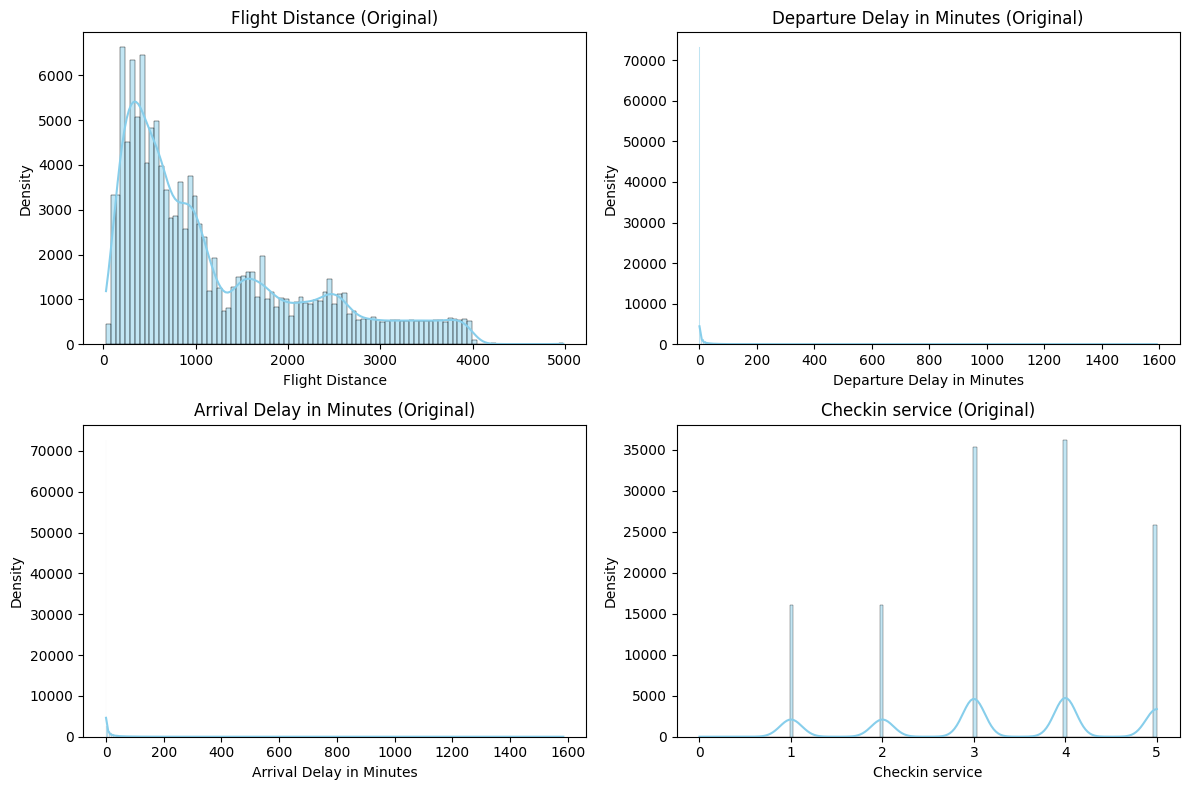

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to apply transformation
columns_to_transform = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Checkin service']
# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot histograms of the original data
for i, column in enumerate(columns_to_transform):
    sns.histplot(df[column], kde=True, ax=axes[i//2, i%2], color='skyblue')
    axes[i//2, i%2].set_title(f'{column} (Original)')
    axes[i//2, i%2].set_xlabel(column)
    axes[i//2, i%2].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()


In [15]:
import numpy as np

# List of columns to apply transformation
columns_to_transform = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Checkin service']

# Apply logarithmic transformation to each column
for column in columns_to_transform:
    df[column] = np.log1p(df[column])

# Verify transformation
print(df[columns_to_transform].describe())


       Flight Distance  Departure Delay in Minutes  Arrival Delay in Minutes  \
count    129487.000000               129487.000000             129487.000000   
mean          6.706260                    1.231098                  1.263394   
std           0.915689                    1.615801                  1.629850   
min           3.465736                    0.000000                  0.000000   
25%           6.028279                    0.000000                  0.000000   
50%           6.739337                    0.000000                  0.000000   
75%           7.464510                    2.564949                  2.639057   
max           8.513988                    7.373374                  7.368340   

       Checkin service  
count    129487.000000  
mean          1.407874  
std           0.340709  
min           0.000000  
25%           1.386294  
50%           1.386294  
75%           1.609438  
max           1.791759  


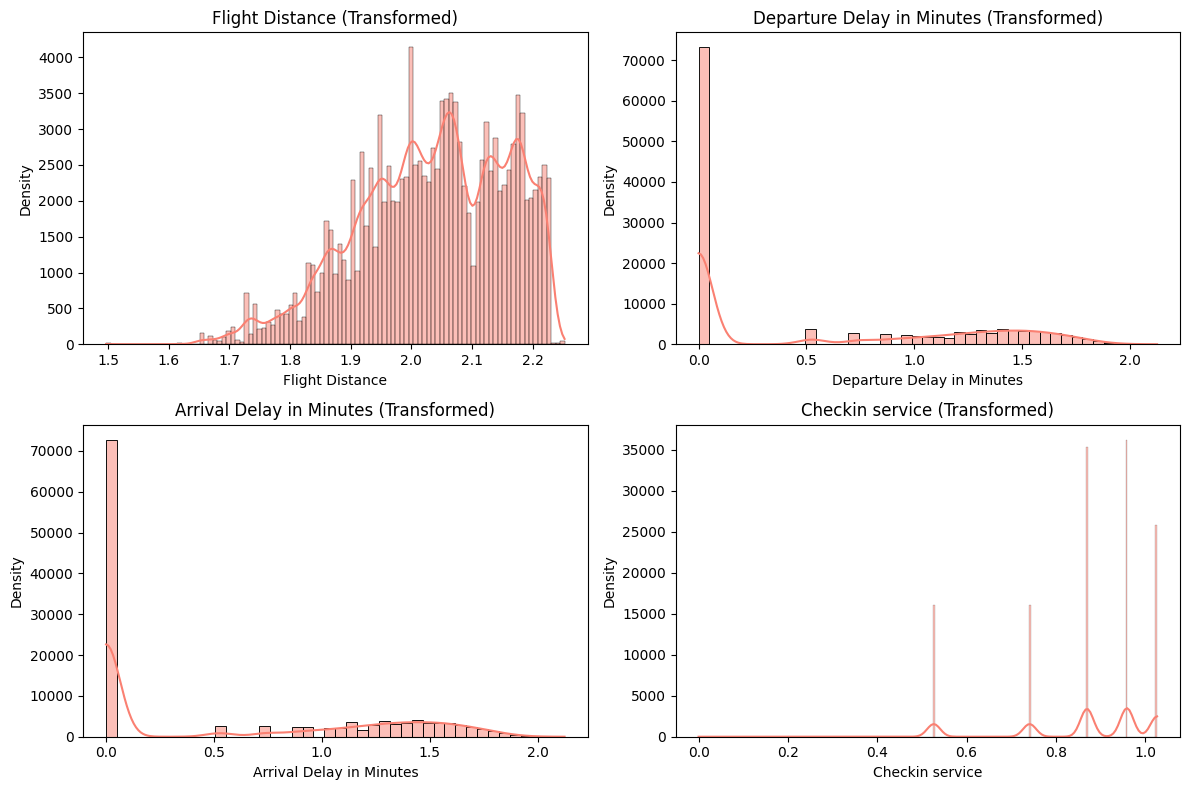

In [16]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Apply logarithmic transformation to each column and plot histograms
for i, column in enumerate(columns_to_transform):
    # Apply logarithmic transformation
    transformed_data = np.log1p(df[column])

    # Plot histogram of transformed data
    sns.histplot(transformed_data, kde=True, ax=axes[i//2, i%2], color='salmon')
    axes[i//2, i%2].set_title(f'{column} (Transformed)')
    axes[i//2, i%2].set_xlabel(column)
    axes[i//2, i%2].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()


In [17]:
# encode categorical variables
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
df = pd.get_dummies(df, columns=categorical_columns)
df.head(5)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,52,5.081404,5,4,3,4,3,4,3,5,...,satisfied,True,False,True,False,True,False,False,True,False
1,36,7.959975,1,1,3,1,5,4,5,4,...,satisfied,True,False,True,False,True,False,True,False,False
2,20,5.262690,2,0,2,4,2,2,2,2,...,neutral or dissatisfied,False,True,False,True,True,False,False,True,False
3,44,8.125039,0,0,0,2,3,4,4,1,...,satisfied,False,True,True,False,True,False,True,False,False
4,49,7.075809,2,3,4,3,4,1,2,2,...,satisfied,True,False,True,False,True,False,False,True,False


In [18]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    73225
satisfied                  56262
Name: count, dtype: int64

In [19]:
df['satisfaction'] = df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1})
df.head(5)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,52,5.081404,5,4,3,4,3,4,3,5,...,1,True,False,True,False,True,False,False,True,False
1,36,7.959975,1,1,3,1,5,4,5,4,...,1,True,False,True,False,True,False,True,False,False
2,20,5.262690,2,0,2,4,2,2,2,2,...,0,False,True,False,True,True,False,False,True,False
3,44,8.125039,0,0,0,2,3,4,4,1,...,1,False,True,True,False,True,False,True,False,False
4,49,7.075809,2,3,4,3,4,1,2,2,...,1,True,False,True,False,True,False,False,True,False


Correlations with satisfaction:
satisfaction                         1.000000
Class_Business                       0.502605
Online boarding                      0.501620
Type of Travel_Business travel       0.449794
Inflight entertainment               0.398334
Seat comfort                         0.348576
On-board service                     0.322329
Leg room service                     0.312557
Cleanliness                          0.306891
Inflight wifi service                0.283291
Flight Distance                      0.249670
Baggage handling                     0.248651
Inflight service                     0.245027
Checkin service                      0.232169
Food and drink                       0.211164
Customer Type_Loyal Customer         0.185925
Ease of Online booking               0.168704
Age                                  0.134001
Gender_Male                          0.011496
Gate location                       -0.002923
Gender_Female                       -0.011496
De

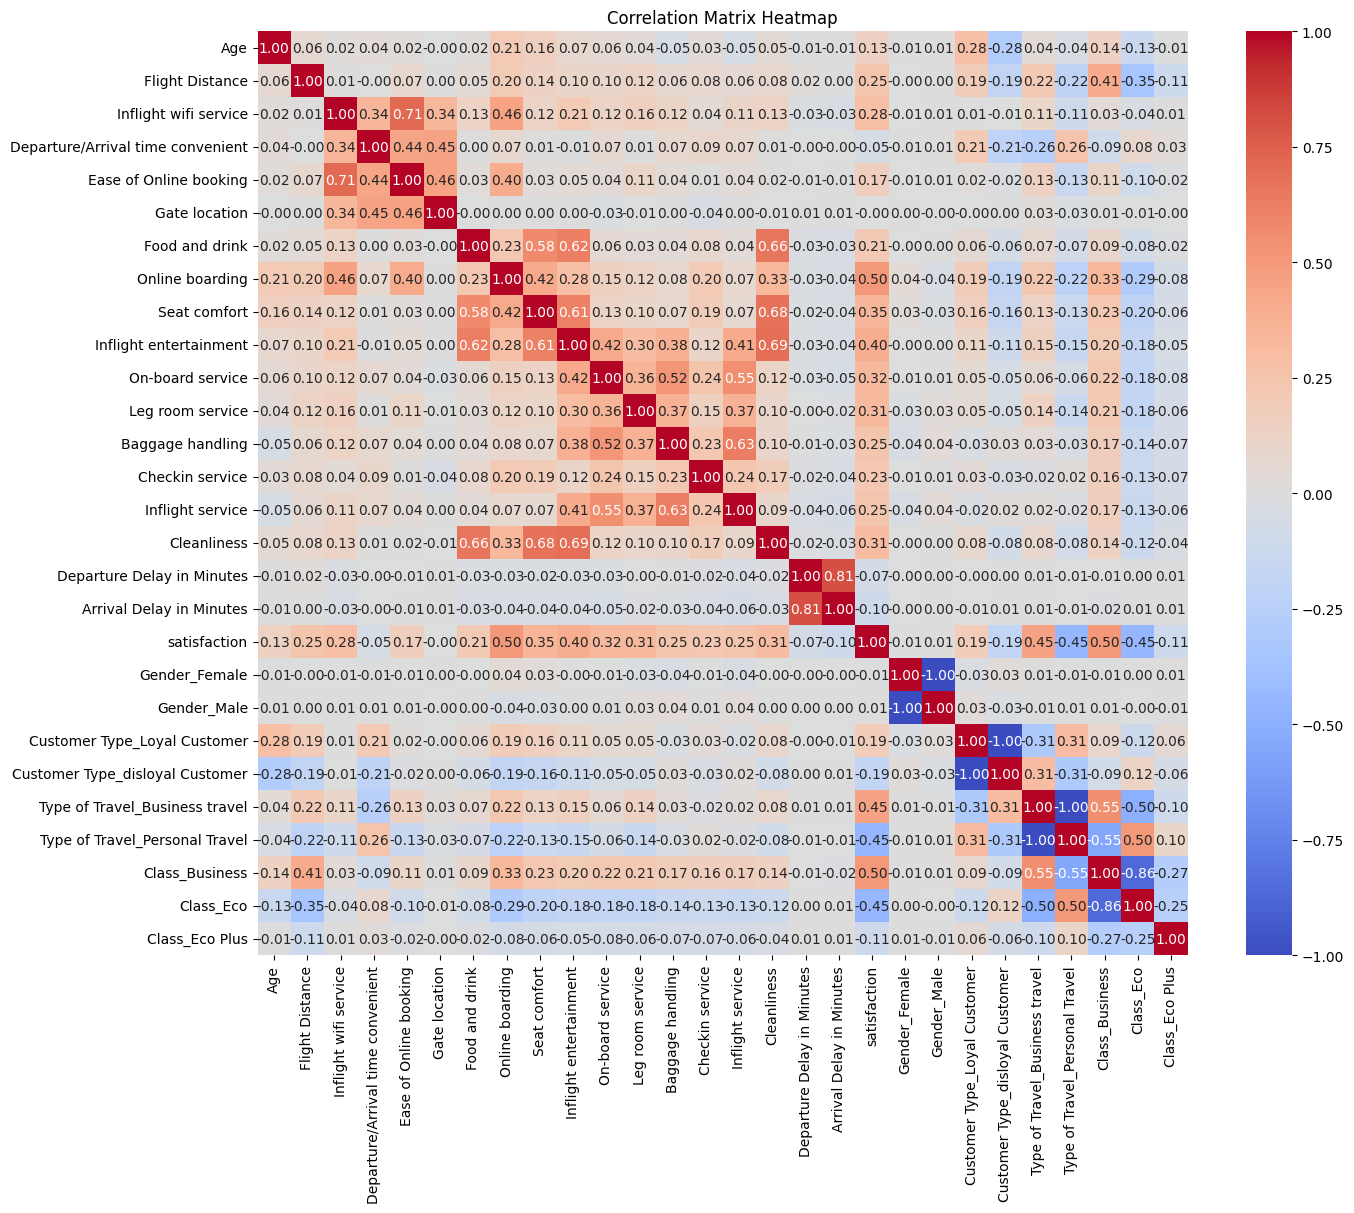

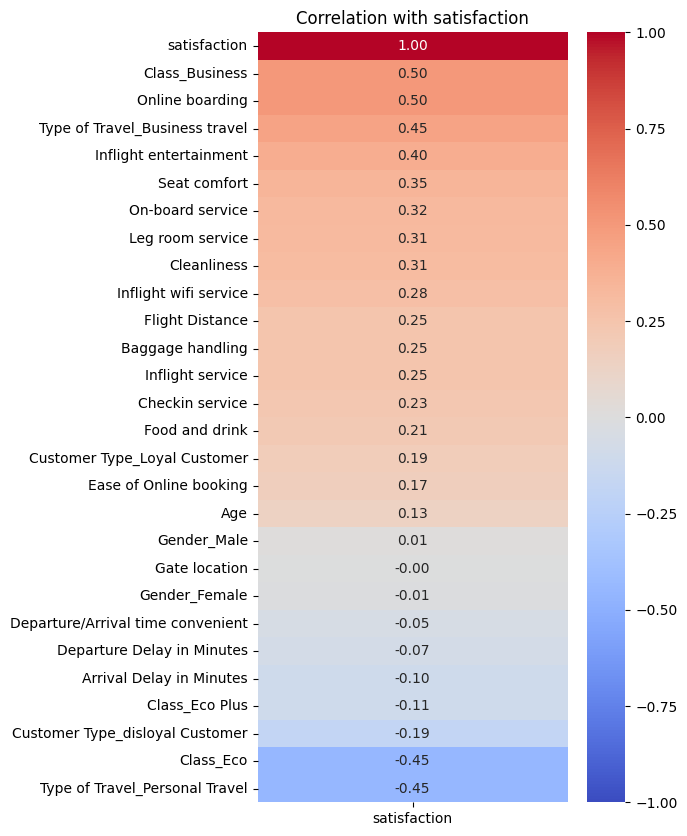

In [20]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Define the target column
target_column = 'satisfaction'

# Sort correlations with the target column in descending order
sorted_correlations = correlation_matrix[target_column].sort_values(ascending=False)

# Display the sorted correlations
print(f"Correlations with {target_column}:\n{sorted_correlations}\n")

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

# create a heatmap focusing on the target column
plt.figure(figsize=(5, 10))
sns.heatmap(correlation_matrix[[target_column]].sort_values(by=target_column, ascending=False), annot=True, fmt=".2f", cmap='coolwarm', cbar=True, vmin=-1, vmax=1)
plt.title(f'Correlation with {target_column}')
plt.show()


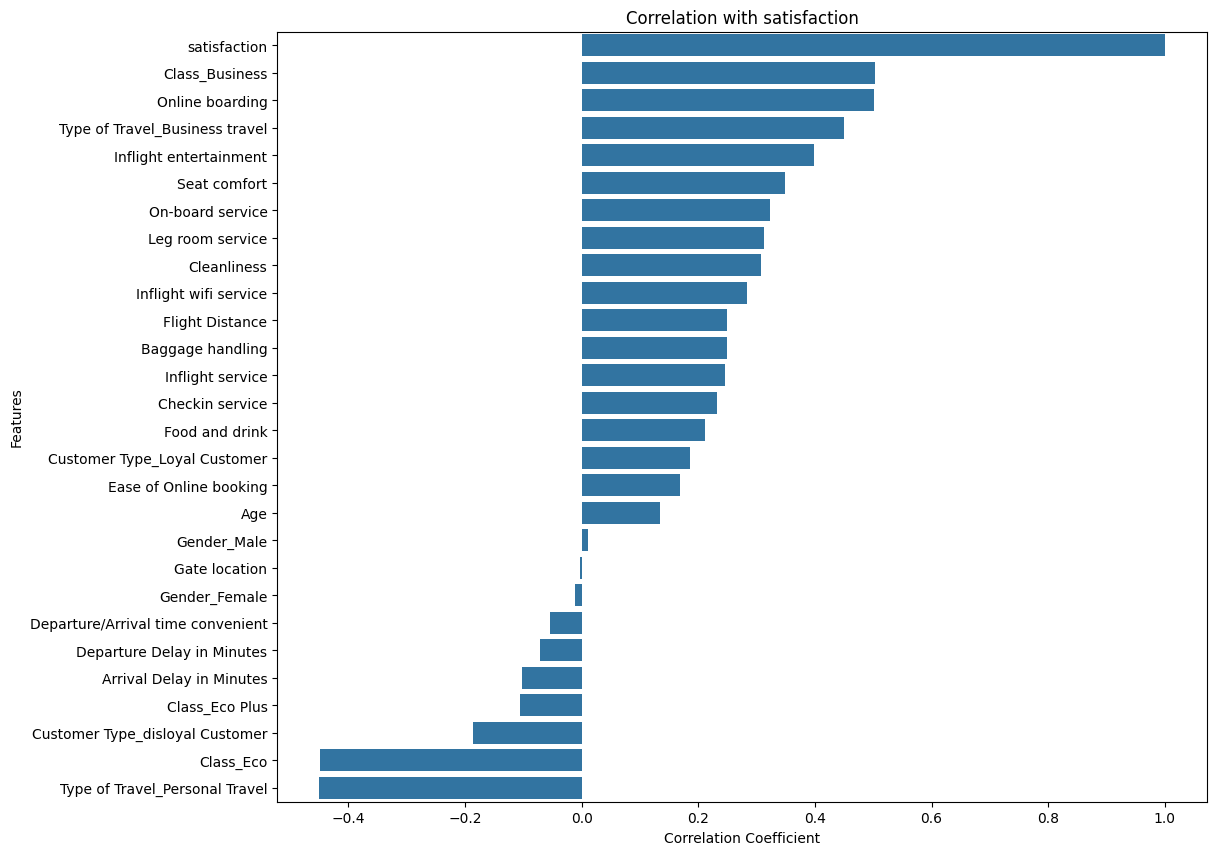

In [21]:
# create a barplot focusing on the target column correlation with features
sorted_corr_matrix = correlation_matrix.sort_values(by=target_column, ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(x=sorted_corr_matrix[target_column], y=sorted_corr_matrix.index)
plt.title(f'Correlation with {target_column}')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


In [22]:
# Define Features and Target Variable
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import RobustScaler



#Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.preprocessing import MinMaxScaler
#Scale the Features
scaler =  StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [25]:
#Train and Compare Multiple Classifier Models
import time

# Capture start time
start_time = time.time()

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Capture end time
end_time = time.time()

# Calculate training time
rf_training_time = end_time - start_time

rf_y_pred = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, rf_y_pred)
report_rf = classification_report(y_test, rf_y_pred)

print("Random Forest Classifier")
print(f"Accuracy: {accuracy_rf}")
print(f"Classification Report:\n{report_rf}\n")
print(f"Training Time: {rf_training_time:.2f} seconds")



Random Forest Classifier
Accuracy: 0.9637809869487991
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14456
           1       0.97      0.94      0.96     11442

    accuracy                           0.96     25898
   macro avg       0.97      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898


Training Time: 16.32 seconds


In [26]:
# Capture start time
start_time = time.time()

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
# Capture end time
end_time = time.time()

# Calculate training time
lr_training_time = end_time - start_time

lr_y_pred = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, lr_y_pred)
report_lr = classification_report(y_test, lr_y_pred)


print("Logistic Regression")
print(f"Accuracy: {accuracy_lr}")
print(f"Classification Report:\n{report_lr}\n")
print(f"Training Time: {lr_training_time:.2f} seconds")

Logistic Regression
Accuracy: 0.8726156459958297
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     14456
           1       0.88      0.83      0.85     11442

    accuracy                           0.87     25898
   macro avg       0.87      0.87      0.87     25898
weighted avg       0.87      0.87      0.87     25898


Training Time: 0.51 seconds


In [27]:
# Capture start time
start_time = time.time()

svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)

# Capture end time
end_time = time.time()

# Calculate training time
svc_training_time = end_time - start_time

svc_y_pred = svc_model.predict(X_test)
accuracy_svc = accuracy_score(y_test, svc_y_pred)
report_svc = classification_report(y_test, svc_y_pred)


print("Support Vector Classifier")
print(f"Accuracy: {accuracy_svc}")
print(f"Classification Report:\n{report_svc}\n")
print(f"Training Time: {svc_training_time:.2f} seconds")


Support Vector Classifier
Accuracy: 0.9546683141555332
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14456
           1       0.96      0.93      0.95     11442

    accuracy                           0.95     25898
   macro avg       0.96      0.95      0.95     25898
weighted avg       0.95      0.95      0.95     25898


Training Time: 309.24 seconds


In [28]:
# Capture start time
start_time = time.time()
# K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
# Capture end time
end_time = time.time()

# Calculate training time
knn_training_time = end_time - start_time

knn_y_pred = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, knn_y_pred)
report_knn = classification_report(y_test, knn_y_pred)

print("K-Nearest Neighbors Classifier")
print(f"Accuracy: {accuracy_knn}")
print(f"Classification Report:\n{report_knn}\n")
print(f"Training Time: {knn_training_time:.2f} seconds")



K-Nearest Neighbors Classifier
Accuracy: 0.9249749015367982
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.93     14456
           1       0.95      0.87      0.91     11442

    accuracy                           0.92     25898
   macro avg       0.93      0.92      0.92     25898
weighted avg       0.93      0.92      0.92     25898


Training Time: 0.05 seconds


In [29]:
from sklearn.naive_bayes import GaussianNB
# Capture start time
start_time = time.time()
# Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Capture end time
end_time = time.time()

# Calculate training time
nb_training_time = end_time - start_time

nb_y_pred = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, nb_y_pred)
report_nb = classification_report(y_test, nb_y_pred)

print("Naive Bayes Classifier")
print(f"Accuracy: {accuracy_nb}")
print(f"Classification Report:\n{report_nb}\n")
print(f"Training Time: {nb_training_time:.2f} seconds")


Naive Bayes Classifier
Accuracy: 0.8490230905861457
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     14456
           1       0.84      0.81      0.83     11442

    accuracy                           0.85     25898
   macro avg       0.85      0.85      0.85     25898
weighted avg       0.85      0.85      0.85     25898


Training Time: 0.08 seconds


In [30]:
# Capture start time
start_time = time.time()
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
# Capture end time
end_time = time.time()

# Calculate training time
dt_training_time = end_time - start_time

dt_y_pred = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, dt_y_pred)
report_dt = classification_report(y_test, dt_y_pred)

print("Decision Tree Classifier")
print(f"Accuracy: {accuracy_dt}")
print(f"Classification Report:\n{report_dt}\n")
print(f"Training Time: {dt_training_time:.2f} seconds")


Decision Tree Classifier
Accuracy: 0.9467140319715808
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14456
           1       0.94      0.94      0.94     11442

    accuracy                           0.95     25898
   macro avg       0.95      0.95      0.95     25898
weighted avg       0.95      0.95      0.95     25898


Training Time: 0.80 seconds


In [31]:
# Capture start time
start_time = time.time()
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
# Capture end time
end_time = time.time()

# Calculate training time
gb_training_time = end_time - start_time

gb_y_pred = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, gb_y_pred)
report_gb = classification_report(y_test, gb_y_pred)


print("Gradient Boosting Classifier")
print(f"Accuracy: {accuracy_gb}")
print(f"Classification Report:\n{report_gb}\n")
print(f"Training Time: {gb_training_time:.2f} seconds")


Gradient Boosting Classifier
Accuracy: 0.941732952351533
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14456
           1       0.95      0.92      0.93     11442

    accuracy                           0.94     25898
   macro avg       0.94      0.94      0.94     25898
weighted avg       0.94      0.94      0.94     25898


Training Time: 23.71 seconds


In [32]:
# Capture start time
start_time = time.time()
# XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
# Capture end time
end_time = time.time()

# Calculate training time
xgb_training_time = end_time - start_time

xgb_y_pred = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, xgb_y_pred)
report_xgb = classification_report(y_test, xgb_y_pred)


print("XGBoost Classifier")
print(f"Accuracy: {accuracy_xgb}")
print(f"Classification Report:\n{report_xgb}\n")
print(f"Training Time: {xgb_training_time:.2f} seconds")


XGBoost Classifier
Accuracy: 0.9640512780909722
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14456
           1       0.97      0.95      0.96     11442

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898


Training Time: 1.45 seconds


[[14141   315]
 [  616 10826]]


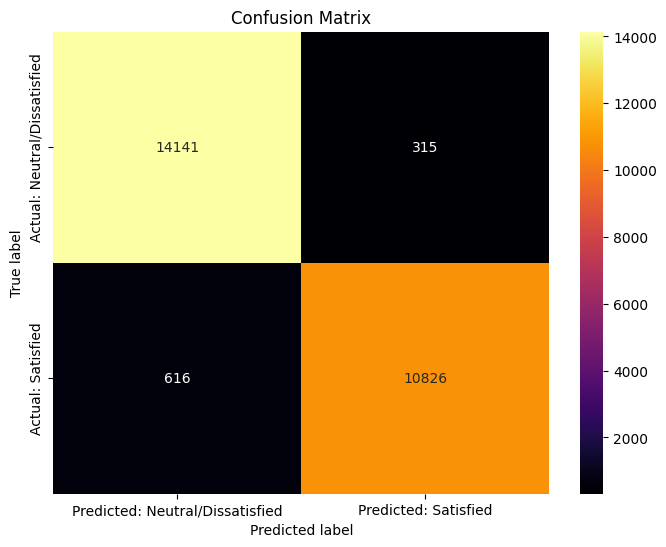

In [38]:
# Confusion Matrix
cm = confusion_matrix(y_test, xgb_y_pred)
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='inferno', xticklabels=['Predicted: Neutral/Dissatisfied', 'Predicted: Satisfied'], yticklabels=['Actual: Neutral/Dissatisfied', 'Actual: Satisfied'])
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [33]:
# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': xgb_y_pred
})

# Display the first few rows of the comparison table
comparison_df.head()

,Actual,Predicted
98180,0,0
24961,1,1
69239,1,1
90485,1,1
36185,1,1


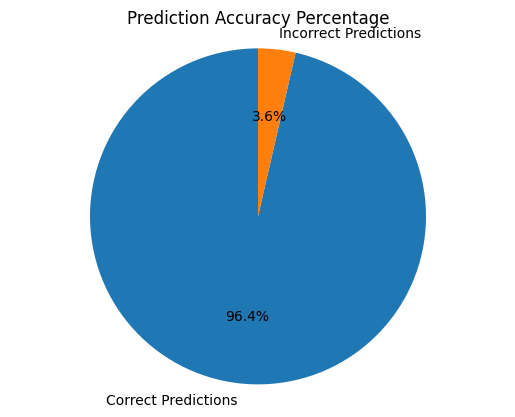

In [34]:
# Calculate the percentage of correct predictions
correct_predictions = len(comparison_df[comparison_df['Actual'] == comparison_df['Predicted']])
percentage_correct = (correct_predictions / len(comparison_df)) * 100

# Create the pie chart
labels = ['Correct Predictions', 'Incorrect Predictions']
sizes = [percentage_correct, 100 - percentage_correct]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
_ = plt.title('Prediction Accuracy Percentage')

In [35]:
# Function to calculate precision and recall from classification report
def get_precision_recall(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    return precision, recall


# Initialize lists to store precision, recall
precision_scores = []
recall_scores = []


# Calculate precision and recall for each model
for y_pred in [rf_y_pred, lr_y_pred, svc_y_pred, knn_y_pred, nb_y_pred, dt_y_pred, gb_y_pred, xgb_y_pred]:
    precision, recall = get_precision_recall(y_test, y_pred)
    precision_scores.append(precision)
    recall_scores.append(recall)

# Define the training times for each model
training_times = [rf_training_time, lr_training_time, svc_training_time, knn_training_time, nb_training_time, dt_training_time, gb_training_time, xgb_training_time]


# Create the DataFrame
data = {
    "Model": ["Random Forest", "Logistic Regression", "Support Vector Machine", "K-Nearest Neighbors",
              "Naive Bayes Classifier", "Decision Tree Classifier", "Gradient Boosting Classifier", "XGBoost Classifier"],
    "Accuracy": [accuracy_rf, accuracy_lr, accuracy_svc, accuracy_knn, accuracy_nb, accuracy_dt, accuracy_gb, accuracy_xgb],
    "Precision": precision_scores,
    "Recall": recall_scores,
    "Training Time (seconds)": training_times
}

accuracy_precision_recall_df = pd.DataFrame(data)

# Display the DataFrame
accuracy_precision_recall_df

# Sort the DataFrame by accuracy in descending order
accuracy_precision_recall_df_sorted = accuracy_precision_recall_df.sort_values(by='Accuracy', ascending=False)

# Display the sorted DataFrame
accuracy_precision_recall_df_sorted


,Model,Accuracy,Precision,Recall,Training Time (seconds)
7,XGBoost Classifier,0.964051,0.964208,0.964051,1.452254
0,Random Forest,0.963781,0.964070,0.963781,16.316353
2,Support Vector Machine,0.954668,0.954897,0.954668,309.235767
5,Decision Tree Classifier,0.946714,0.946761,0.946714,0.804647
6,Gradient Boosting Classifier,0.941733,0.941948,0.941733,23.713288
3,K-Nearest Neighbors,0.924975,0.926619,0.924975,0.048030
1,Logistic Regression,0.872616,0.872749,0.872616,0.513179
4,Naive Bayes Classifier,0.849023,0.848798,0.849023,0.081616


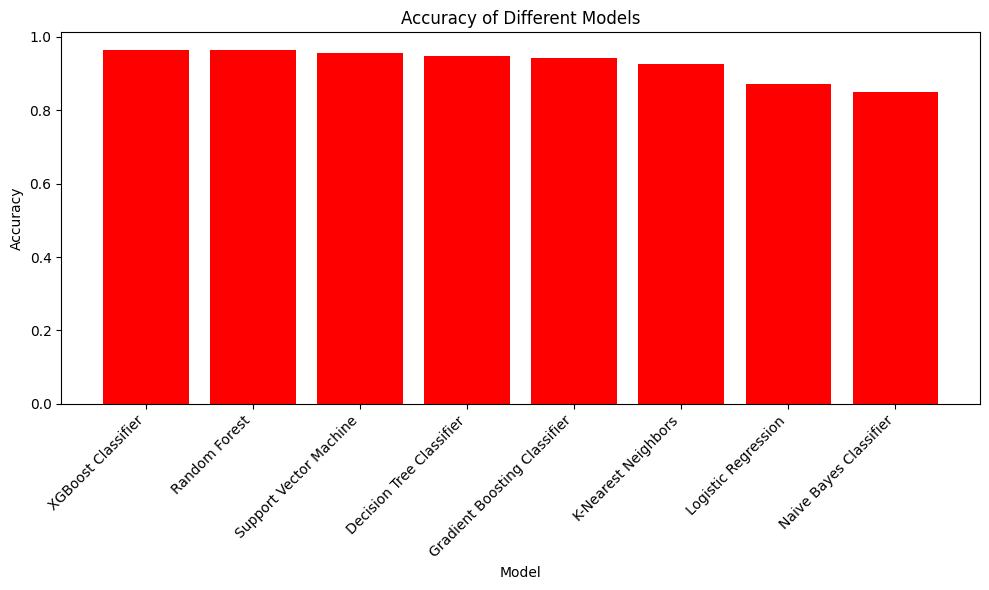

In [36]:
# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(accuracy_precision_recall_df_sorted['Model'], accuracy_precision_recall_df_sorted['Accuracy'], color='red')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


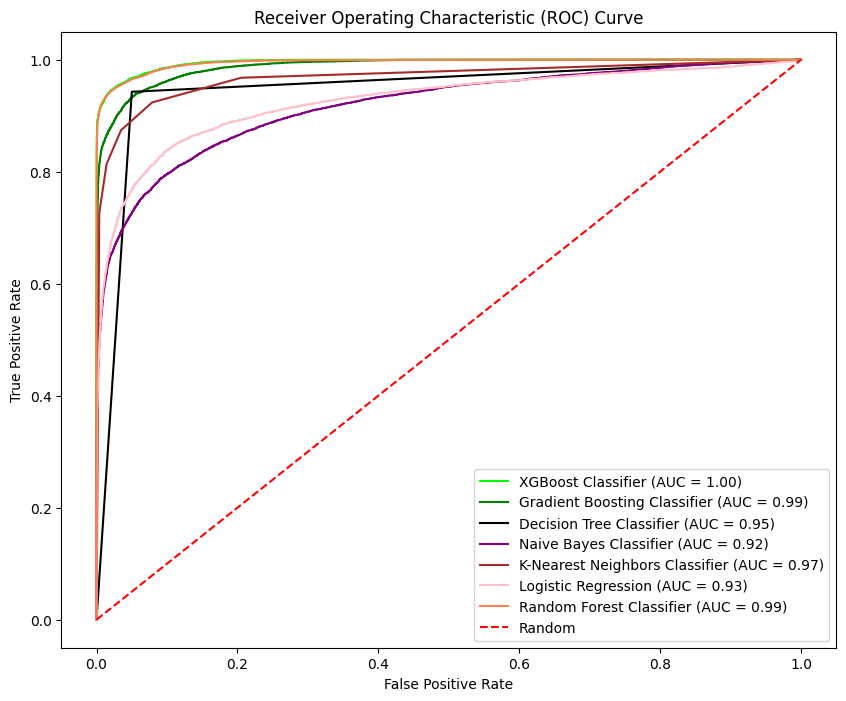

In [37]:
# ROC curve and ROC area
# Calculate probabilities for positive class
xgb_y_probs = xgb_model.predict_proba(X_test)[:, 1]
gb_y_probs = gb_model.predict_proba(X_test)[:, 1]
dt_y_probs = dt_model.predict_proba(X_test)[:, 1]
nb_y_probs = nb_model.predict_proba(X_test)[:, 1]
knn_y_probs = knn_model.predict_proba(X_test)[:, 1]
lr_y_probs = lr_model.predict_proba(X_test)[:, 1]
rf_y_probs = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr1, tpr1, threshold1 = roc_curve(y_test, xgb_y_probs)
fpr2, tpr2, threshold2 = roc_curve(y_test, gb_y_probs)
fpr3, tpr3, threshold3 = roc_curve(y_test, dt_y_probs)
fpr4, tpr4, threshold4 = roc_curve(y_test, nb_y_probs)
fpr5, tpr5, threshold5 = roc_curve(y_test, knn_y_probs)
fpr6, tpr6, threshold6 = roc_curve(y_test, lr_y_probs)
fpr7, tpr7, threshold7 = roc_curve(y_test, rf_y_probs)

roc_auc = roc_auc_score(y_test, xgb_y_probs)
roc_auc_gb = roc_auc_score(y_test, gb_y_probs)
roc_auc_dt = roc_auc_score(y_test, dt_y_probs)
roc_auc_nb = roc_auc_score(y_test, nb_y_probs)
roc_auc_knn = roc_auc_score(y_test, knn_y_probs)
roc_auc_lr = roc_auc_score(y_test, lr_y_probs)
roc_auc_rf = roc_auc_score(y_test, rf_y_probs)

# Plot ROC curve
plt.figure(figsize=(10, 8))

plt.plot(fpr1, tpr1, label='XGBoost Classifier (AUC = {:.2f})'.format(roc_auc), color='lime')
plt.plot(fpr2, tpr2, label='Gradient Boosting Classifier (AUC = {:.2f})'.format(roc_auc_gb), color='green')
plt.plot(fpr3, tpr3, label='Decision Tree Classifier (AUC = {:.2f})'.format(roc_auc_dt), color='black')
plt.plot(fpr4, tpr4, label='Naive Bayes Classifier (AUC = {:.2f})'.format(roc_auc_nb), color='purple')
plt.plot(fpr5, tpr5, label='K-Nearest Neighbors Classifier (AUC = {:.2f})'.format(roc_auc_knn), color='brown')
plt.plot(fpr6, tpr6, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_lr), color='pink')
plt.plot(fpr7, tpr7, label='Random Forest Classifier (AUC = {:.2f})'.format(roc_auc_rf), color='coral')

plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()